# Assignement 1 - Social graphs and interactions (02805) 
## 2rd October 2018 - Emilie, Jon & Maren

### Part One: Network Models

### 1. Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when p = 1.
    * *As seen by the python code below the average shortest path length for the different graphs vary greatly. Graph 1 has 0 probability on being random, while with a 10% probability these 'short-cuts' are created that makes the average path length significally smaller.*
    * When p=1 the graph is completely random.


The average shortest path length for graph with p=0.0 is 62.875751503006015
The average shortest path length for graph with p=0.1 is 7.312208416833667
The average shortest path length for graph with p=1.0 is 4.779623246492986


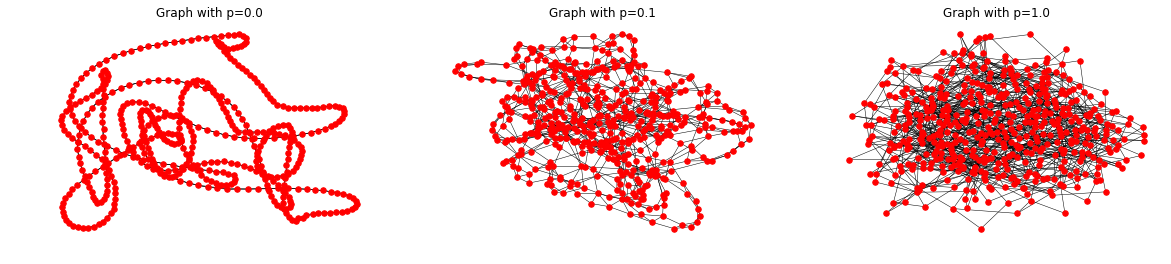

In [60]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

print("The average shortest path length for graph with p=0.0 is %s" % nx.average_shortest_path_length(G1))
print("The average shortest path length for graph with p=0.1 is %s" % nx.average_shortest_path_length(G2))
print("The average shortest path length for graph with p=1.0 is %s" % nx.average_shortest_path_length(G3))

fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
nx.draw(G1, node_size=30, width=0.5, ax=axs[0])
axs[0].set_title('Graph with p=0.0')
nx.draw(G2, node_size=30, width=0.5, ax=axs[1])
axs[1].set_title('Graph with p=0.1')
nx.draw(G3, node_size=30, width=0.5, ax=axs[2])
axs[2].set_title('Graph with p=1.0')
plt.show()

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. Since a picture's worth 1000 words.


In [12]:

############ ADARSEL!! TAGER VANDVITTIG LANG TID AT KØRERE (CA 15MIN) SÅ VÆR TÅLMODIG! ####################

p = [0,0.01,0.03,0.05,0.1,0.2]
d = [[],[],[],[],[],[]]

print("start")

# Laver 50x6 plots og finder ASPL af alle, tager lang tid!
for i in range(0,6):
    for j in range(0,50):
        d[i].append(nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, p[i])))
    print("Process at %s out of 6" % i+1)

#print("result: %s" % d)
        

start
0
1
2
3
4
5
result: [[62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503

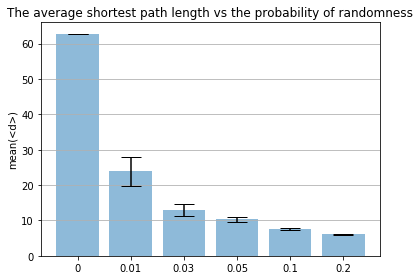

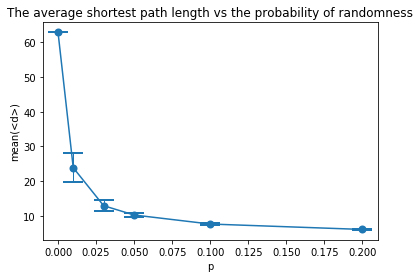

In [61]:
# Udregner mean + std for alle p
d_mean = [0,0,0,0,0,0]
d_std = [0,0,0,0,0,0]

for i in range(0,len(d)):
    d_std[i] = np.std(d[i])
    d_mean[i] = np.mean(d[i])


########### METODE 1 #############
x_pos = np.arange(len(p))
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, d_mean, yerr=d_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mean(<d>)')
ax.set_xticks(x_pos)
ax.set_xticklabels(p)
ax.set_title('The average shortest path length vs the probability of randomness')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

########### METODE 2 #############
fig, ax = plt.subplots(nrows=1, sharex=True)
plt.errorbar(p, d_mean, d_std, fmt='-o', capsize=10, elinewidth=1,markeredgewidth=2)
ax.set_ylabel('mean(<d>)')
ax.set_xlabel('p')
ax.set_title('The average shortest path length vs the probability of randomness')
plt.show()

### 2. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)